In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataframe Shape: (34924, 3)
  subject classname            img
0    p012        c0  img_10206.jpg
1    p012        c0  img_27079.jpg
2    p012        c0  img_50749.jpg
3    p012        c0  img_97089.jpg
4    p012        c0  img_37741.jpg


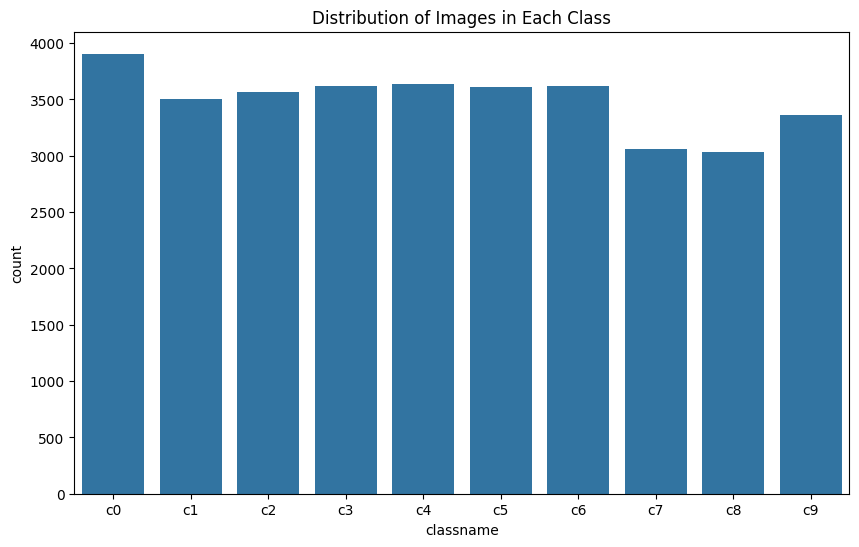


Number of images per class:
classname
c0    3906
c4    3634
c6    3622
c3    3618
c5    3608
c2    3566
c1    3508
c9    3362
c7    3064
c8    3036
Name: count, dtype: int64


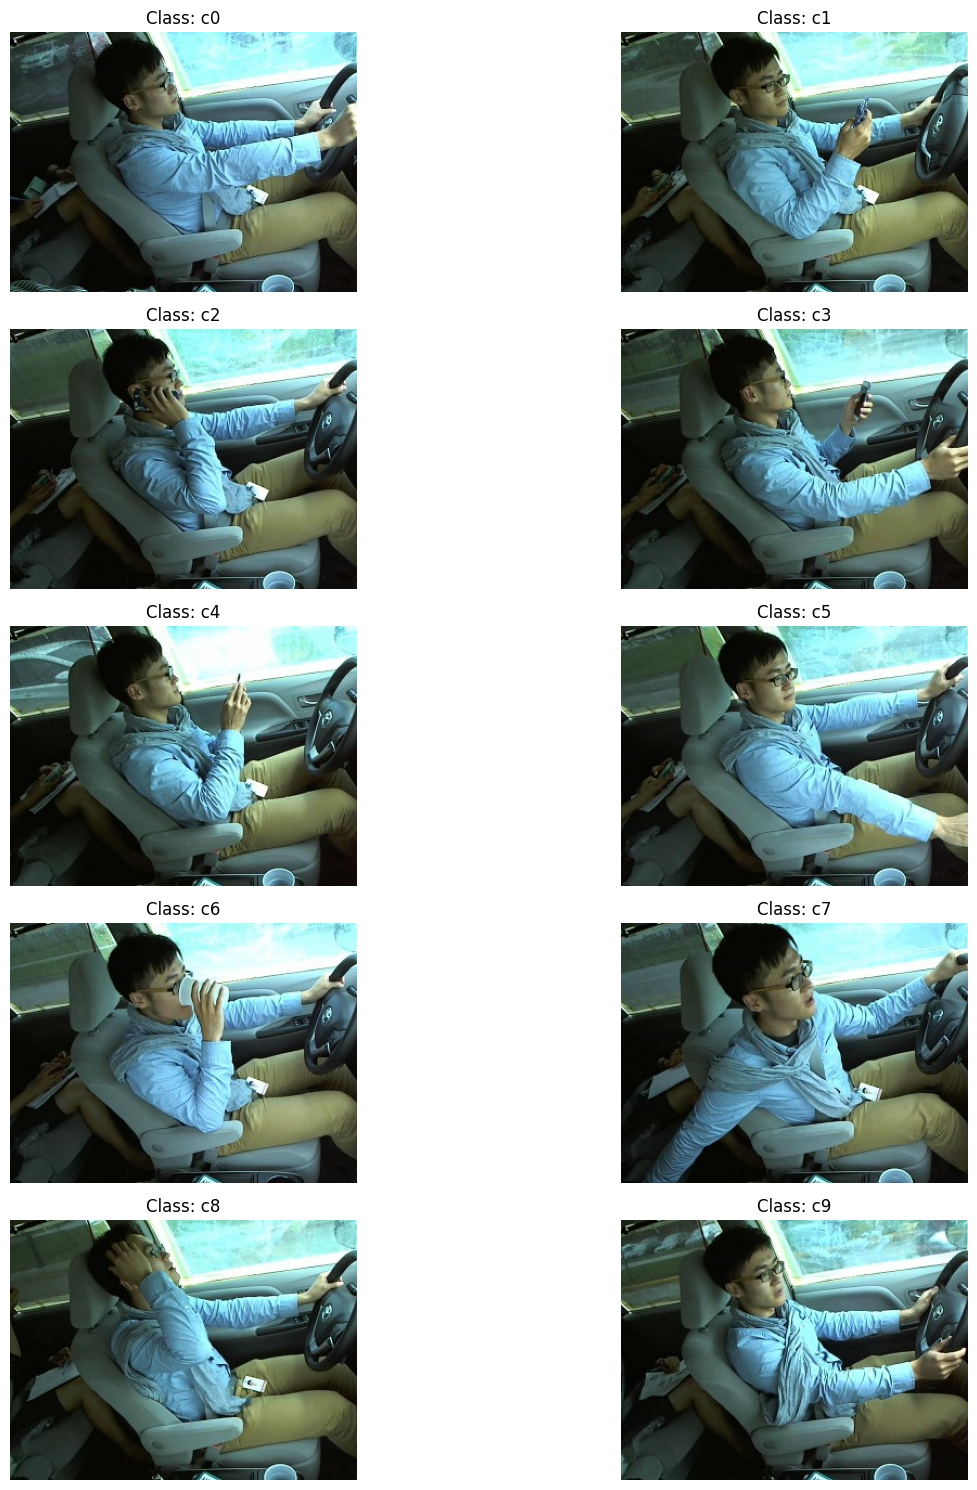


Checking for missing values in the dataset:
subject      0
classname    0
img          0
dtype: int64

Summary statistics:
       subject classname            img
count    34924     34924          34924
unique      20        10          17462
top       p021        c0  img_10206.jpg
freq      2474      3906              2


In [19]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

# Paths to the dataset
csv_file_path = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/driver_imgs_list.csv'
train_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/train'
test_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/test'

# Load the CSV file with image labels
df = pd.read_csv(csv_file_path)
print(f"Dataframe Shape: {df.shape}")
print(df.head())

# Plotting distribution of images per class (c0 to c9)
plt.figure(figsize=(10, 6))
sns.countplot(x='classname', data=df)
plt.title('Distribution of Images in Each Class')
plt.show()

# Count the number of images in each class
class_counts = df['classname'].value_counts()
print("\nNumber of images per class:")
print(class_counts)

# Displaying some sample images from each class
def display_sample_images(df, train_dir):
    plt.figure(figsize=(15, 15))
    
    # Show one image per class (c0 to c9)
    for i, classname in enumerate(df['classname'].unique()):
        # Get one sample image for the class
        img_name = df[df['classname'] == classname].iloc[0]['img']
        img_path = os.path.join(train_dir, classname, img_name)
        
        # Read the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        
        # Plot the image
        plt.subplot(5, 2, i+1)
        plt.imshow(img)
        plt.title(f"Class: {classname}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df, train_dir)

# Check missing values
print("\nChecking for missing values in the dataset:")
print(df.isnull().sum())

# Display general statistics about the data
print("\nSummary statistics:")
print(df.describe())


Dataframe Shape: (34924, 3)
  subject classname            img
0    p012        c0  img_10206.jpg
1    p012        c0  img_27079.jpg
2    p012        c0  img_50749.jpg
3    p012        c0  img_97089.jpg
4    p012        c0  img_37741.jpg


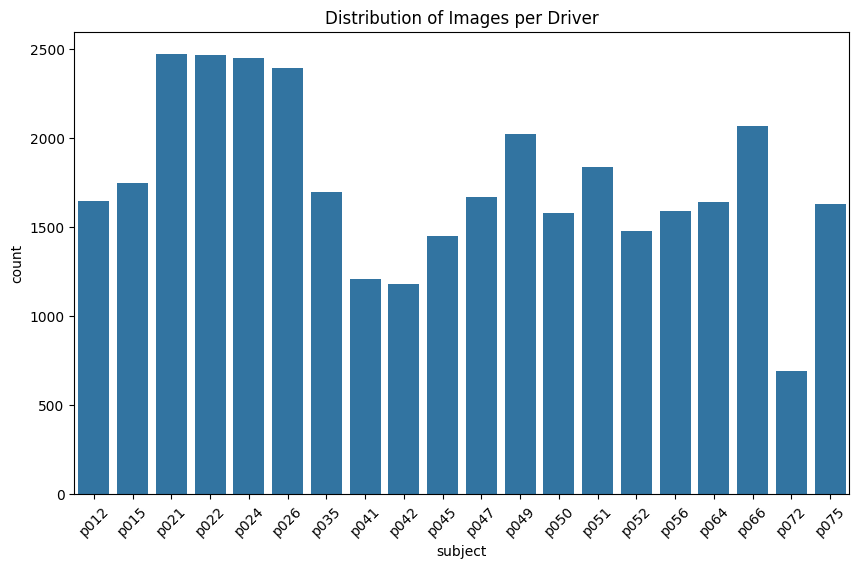

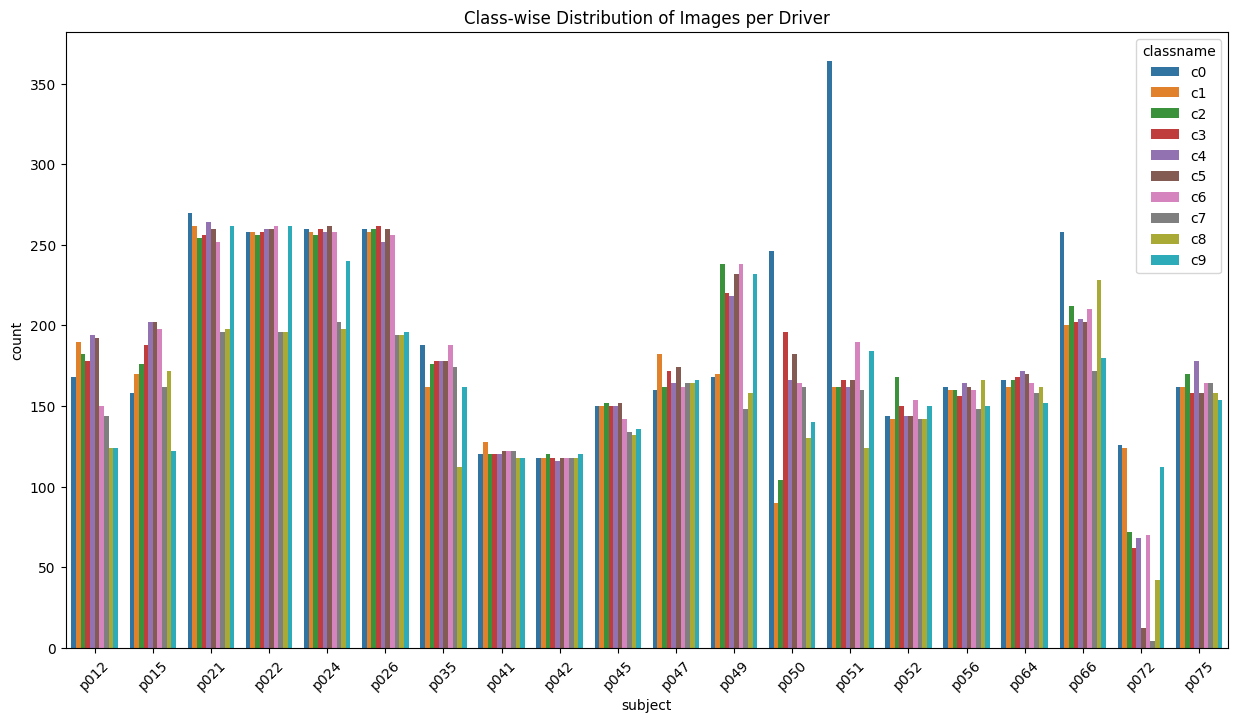

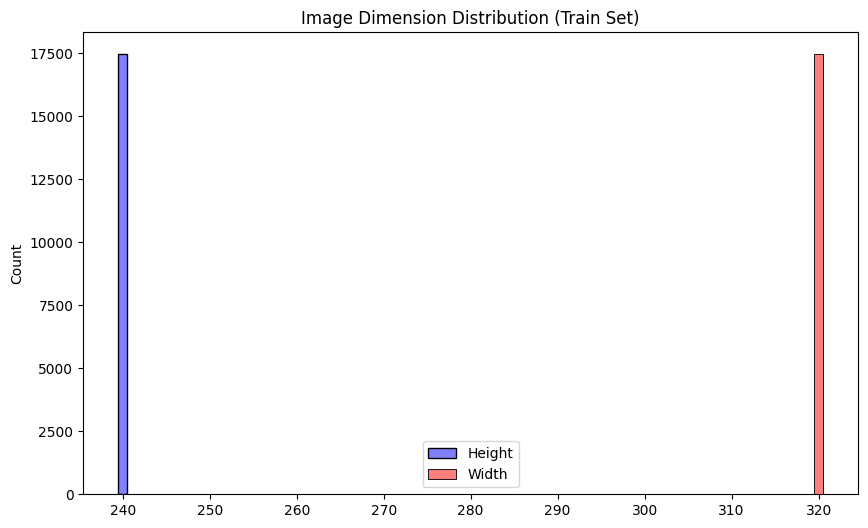

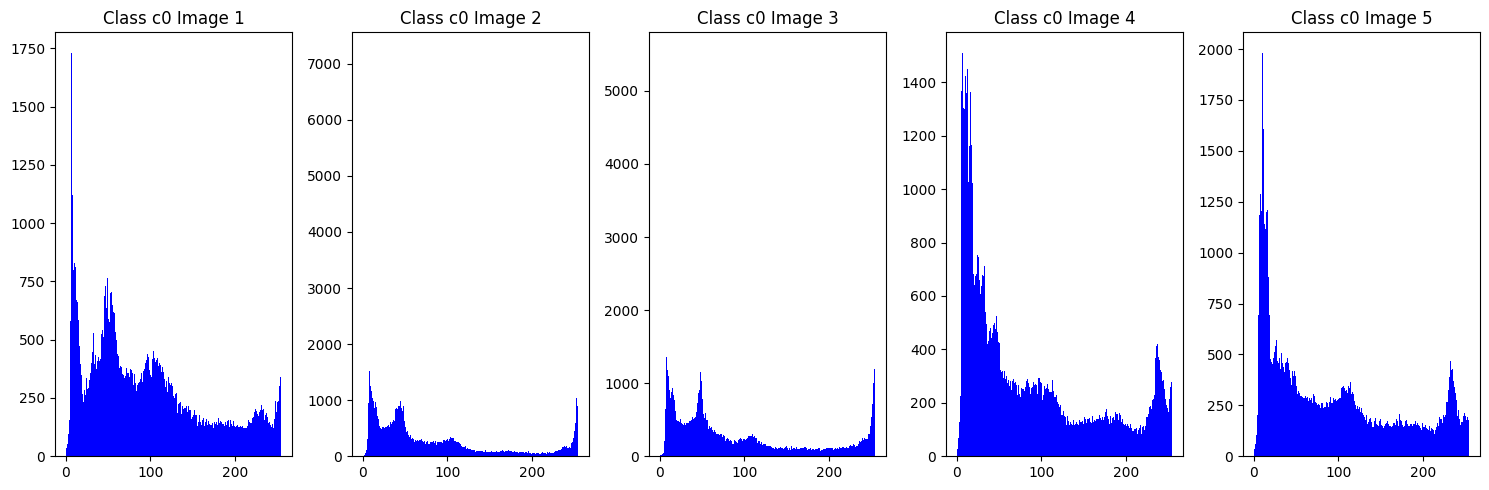

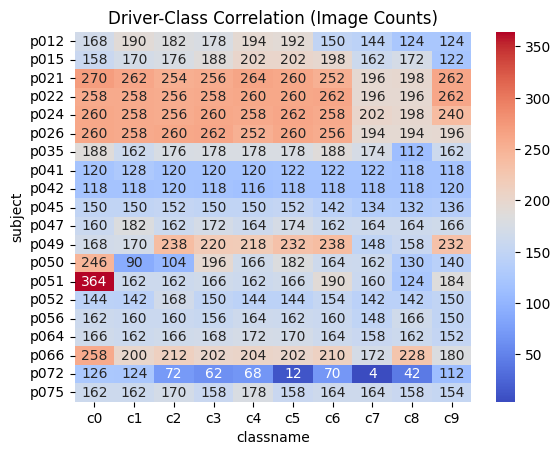

C:\Users\dilee_orle2lt\AppData\Local\Temp\ipykernel_45072\949577444.py:95: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  img_hash = hash(img.tostring())


Number of duplicate images found: 0

No duplicate images found in the dataset.


In [20]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


# File paths
csv_file_path = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/driver_imgs_list.csv'
train_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/train'
test_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/test'

# Load the driver image classification data
df = pd.read_csv(csv_file_path)
print(f"Dataframe Shape: {df.shape}")
print(df.head())


# 2. Driver-wise Image Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=df)
plt.title('Distribution of Images per Driver')
plt.xticks(rotation=45)
plt.show()

# 3. Class-wise Distribution of Images per Driver
plt.figure(figsize=(15, 8))
sns.countplot(x='subject', hue='classname', data=df)
plt.title('Class-wise Distribution of Images per Driver')
plt.xticks(rotation=45)
plt.show()

# 4. Analyzing image dimensions
def analyze_image_dimensions(image_dir):
    heights = []
    widths = []
    
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith('.jpg'):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                heights.append(img.shape[0])
                widths.append(img.shape[1])
    
    return heights, widths

# Analyze dimensions for the train set
heights, widths = analyze_image_dimensions(train_dir)
plt.figure(figsize=(10, 6))
sns.histplot(heights, kde=True, color='blue', label='Height')
sns.histplot(widths, kde=True, color='red', label='Width')
plt.title('Image Dimension Distribution (Train Set)')
plt.legend()
plt.show()

# 5. Image Intensity Distribution for Each Class
def plot_image_intensity_distribution(image_dir, class_name, num_samples=5):
    class_dir = os.path.join(image_dir, class_name)
    files = os.listdir(class_dir)[:num_samples]  # Pick a few sample images

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(files):
        img_path = os.path.join(class_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Plot histogram for each image
        plt.subplot(1, num_samples, i + 1)
        plt.hist(img.ravel(), bins=256, color='blue')
        plt.title(f'Class {class_name} Image {i+1}')
        plt.tight_layout()

    plt.show()

# Display intensity distribution for class c0
plot_image_intensity_distribution(train_dir, 'c0', num_samples=5)

# 6. Correlation between Drivers and Classes
driver_class_pivot = pd.pivot_table(df, values='img', index='subject', columns='classname', aggfunc='count')
sns.heatmap(driver_class_pivot, cmap='coolwarm', annot=True, fmt='g')
plt.title('Driver-Class Correlation (Image Counts)')
plt.show()

# 7. Check for duplicate images
def check_for_duplicates(image_dir):
    image_hashes = {}
    duplicate_images = []

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith('.jpg'):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                img_hash = hash(img.tostring())
                
                if img_hash in image_hashes:
                    duplicate_images.append(img_path)
                else:
                    image_hashes[img_hash] = img_path
    
    return duplicate_images

# Checking for duplicates in the train dataset
duplicates = check_for_duplicates(train_dir)
print(f"Number of duplicate images found: {len(duplicates)}")
if duplicates:
    print(f"Sample duplicate images:\n {duplicates[:5]}")

# Summary of duplicate images
if duplicates:
    print(f"\nTotal duplicate images found: {len(duplicates)}")
else:
    print("\nNo duplicate images found in the dataset.")


c:\Users\dilee_orle2lt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6481 - loss: 1.0210 - val_accuracy: 0.9831 - val_loss: 0.0718
Epoch 2/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9893 - loss: 0.0373 - val_accuracy: 0.9908 - val_loss: 0.0374
Epoch 3/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.9957 - loss: 0.0165 - val_accuracy: 0.9913 - val_loss: 0.0342
Epoch 4/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.9888 - val_loss: 0.0410
Epoch 5/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.9972 - loss: 0.0120 - val_accuracy: 0.9906 - val_loss: 0.0402
Epoch 6/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9966 - loss: 0.0123 - val_accuracy: 0.9938 - val_loss: 0.0263
Epoch 7/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9973 - val_loss: 0.0125
Epoch 8/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.9998 - loss: 0.0014 - 

219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9986 - loss: 0.0144
Test accuracy: 0.9983


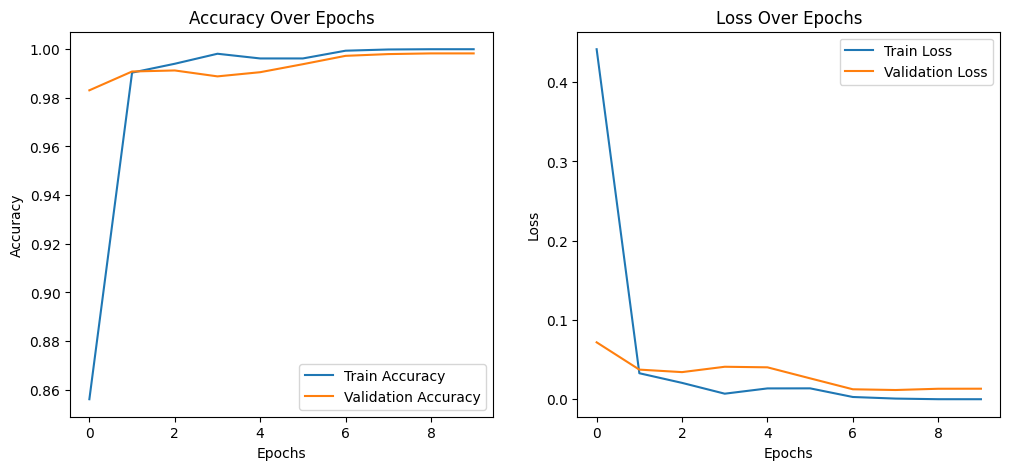

In [21]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Paths to the dataset
#csv_file_path = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/driver_imgs_list.csv'
train_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/train'
test_dir = '/Users/dilee_orle2lt/OneDrive/Desktop/archive/imgs/test'

# Load the CSV file with image labels
df = pd.read_csv(csv_file_path)

# Prepare the image data and labels
X = []
y = []

# Iterate over the rows in the CSV to match images to their labels
for index, row in df.iterrows():
    class_label = row['classname']  # The class label (c0 to c9)
    image_name = row['img']         # The image file name
    
    # Construct the full path to the image
    image_path = os.path.join(train_dir, class_label, image_name)
    
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image to a fixed size (e.g., 64x64)
    img = cv2.resize(img, (64, 64))
    
    # Append the image and the corresponding label to X and y
    X.append(img)
    y.append(int(class_label[1:]))  # Convert 'c0' to 0, 'c1' to 1, etc.

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the image data
X = X / 255.0

# Convert the labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=10)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (c0 to c9)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Save the model (optional)
model.save('driver_distraction_model.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
!pip install tensorflow



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
